# Wavelet Transform

The wavelet transform is a mathematical technique used to analyze signals by decomposing them into a set of wavelets at different scales. It is similar in some ways to the Fourier Transform, but it has the added advantage of being able to capture both time and frequency information.

The wavelet transform works by decomposing a signal into a series of wavelets at different scales. The scale of a wavelet refers to its frequency bandwidth, with smaller scales capturing high-frequency information and larger scales capturing low-frequency information. By decomposing a signal into wavelets at different scales, the wavelet transform can capture both the local and global features of a signal, including sharp changes and transient events.

The wavelet transform can be performed using different types of wavelets, such as the Haar wavelet, the Daubechies wavelet, or the Coiflet wavelet. Each type of wavelet has different mathematical properties, which make it more or less suitable for analyzing specific types of signals.

The wavelet transform is used in a wide range of applications, including signal processing, image compression, feature extraction, and pattern recognition.

# What's a wavelet

A wavelet is a mathematical function used in wavelet analysis to analyze signals. Wavelets are functions that can be dilated (scaled up) and translated (shifted in time) to analyze different scales and positions of a signal.

Wavelets have certain mathematical properties that make them useful in signal analysis. For example, wavelets are localized functions both in the time domain and frequency domain, which means they can provide detailed information about high-frequency features and fine details of a signal. Additionally, wavelets can have different shapes and sizes, which makes them suitable for analyzing signals with different characteristics.

There are many types of wavelets, each with different mathematical properties and suitable for different types of signals. Some examples of common wavelets are the Haar wavelet, the Daubechies wavelet, the Coiflet wavelet, and the Morlet wavelet. The choice of the appropriate wavelet depends on the type of signal being analyzed and the objectives of the analysis.

# Haar Wavelet

The Haar wavelet is the simplest and most widely used wavelet in wavelet analysis.

The Haar wavelet is defined by two functions: the mother wavelet and the father wavelet. The mother wavelet is a simple step function that begins at zero, rises to one over the first half of its interval, and then drops back to zero over the second half. The father wavelet is a scaled and shifted version of the mother wavelet.

The Haar wavelet is useful for analyzing signals with sharp transitions or discontinuities, such as digital signals or piecewise-constant signals. It is particularly useful in image processing, where it can be used for tasks such as edge detection, image compression, and denoising.

One advantage of the Haar wavelet is its computational simplicity, which makes it fast and efficient for use in real-time applications. However, its simple shape also means that it may not be as effective as other wavelets for analyzing signals with complex features or high-frequency content.

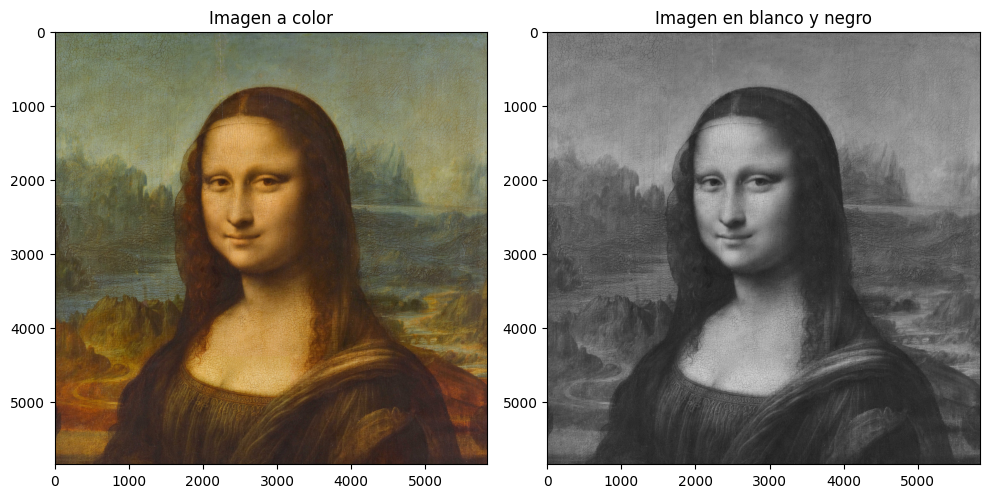

La imagen tiene un tamaño de 5843 píxeles de alto y 5843 píxeles de ancho.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen a color
image_color = cv2.imread('imagen.jpg')
# Cargar la imagen en escala de grises
image_gray = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

alto1, ancho1, canales1 = image_color.shape
alto2, ancho2= image_gray.shape

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen a color en el primer subplot
axes[0].imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
# axes[0].axis('off')
axes[0].set_title('Imagen a color')

# Mostrar la imagen en escala de grises en el segundo subplot
axes[1].imshow(image_gray, cmap='gray')
# axes[1].axis('off')
axes[1].set_title('Imagen en blanco y negro')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()
print('La imagen tiene un tamaño de {} píxeles de alto y {} píxeles de ancho.'.format(alto1, ancho1))

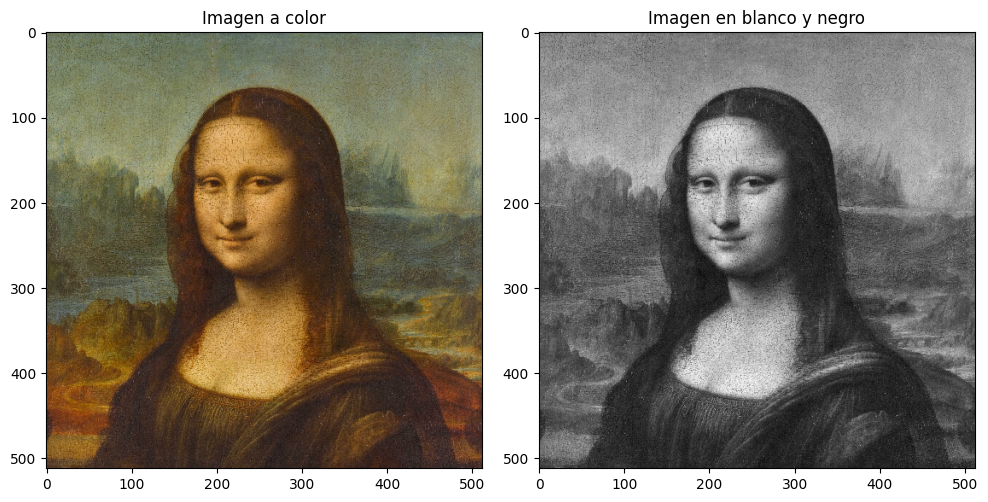

True

In [6]:
# Redimensionar la imagen a 512x512 píxeles
resized_image_color = cv2.resize(image_color, (512, 512))
resized_image_gray = cv2.resize(image_gray, (512, 512))

#Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la imagen a color en el primer subplot
axes[0].imshow(cv2.cvtColor(resized_image_color, cv2.COLOR_BGR2RGB))
# axes[0].axis('off')
axes[0].set_title('Imagen a color')

# Mostrar la imagen en escala de grises en el segundo subplot
axes[1].imshow(resized_image_gray, cmap='gray')
# axes[1].axis('off')
axes[1].set_title('Imagen en blanco y negro')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()
cv2.imwrite("image_color.jpg",resized_image_color)
cv2.imwrite("image_gray.jpg",resized_image_gray)

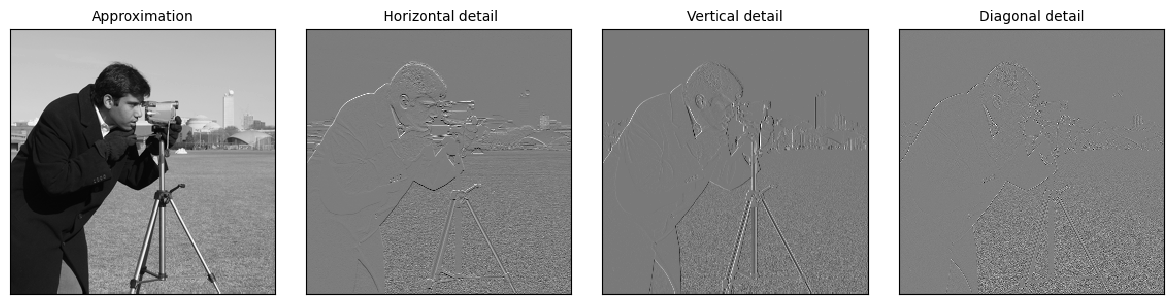

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

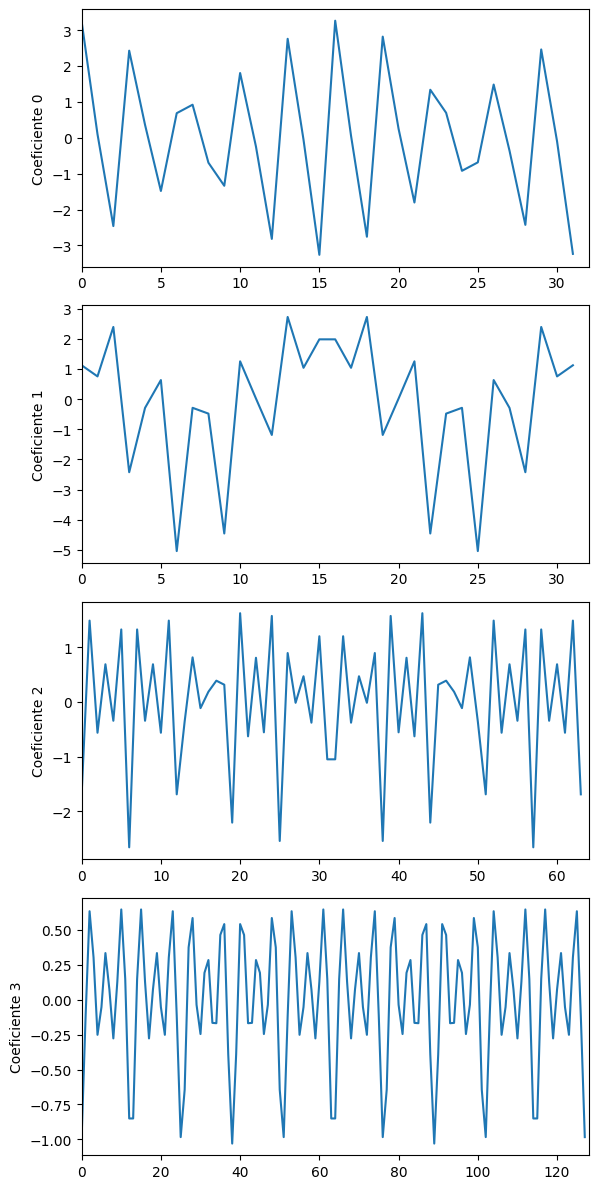

In [3]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Crear una señal de ejemplo
x = np.linspace(0, 1, num=256)
y = np.sin(2 * np.pi * 10 * x) + np.sin(2 * np.pi * 20 * x) + np.sin(2 * np.pi * 30 * x)

# Realizar la wavelet transform
coeffs = pywt.wavedec(y, 'haar', level=3)

# Graficar los coeficientes
fig, axs = plt.subplots(len(coeffs), 1, figsize=(6, 12))
for i, c in enumerate(coeffs):
    axs[i].plot(c)
    axs[i].set_xlim(0, len(c))
    axs[i].set_ylabel('Coeficiente %d' % i)
plt.tight_layout()
plt.show()

